In [23]:
import librosa
import torch
import pandas as pd
from tqdm import tqdm 
import numpy as np
import matplotlib.pyplot as plt
tqdm.pandas()

In [12]:
from transformers import AutoFeatureExtractor, FlaxWhisperForAudioClassification

model_name = "JackismyShephard/whisper-medium.en-finetuned-gtzan"
feature_extractor = AutoFeatureExtractor.from_pretrained(model_name)
model = FlaxWhisperForAudioClassification.from_pretrained(model_name, from_pt=True)

def get_input_features(waveform: list[float], sr: int, feature_extractor):
    inputs = feature_extractor(waveform, sampling_rate=sr, return_tensors="np")
    return inputs.input_features

def get_outputs(input_features, model):
    with torch.no_grad():
        return model(input_features)

def get_embeddings(audio_file: str):
    waveform, sr = librosa.load(audio_file, sr=16000)

    input_features = get_input_features(waveform, sr, feature_extractor)
    outputs = get_outputs(input_features, model)

    logits = outputs.logits
    embeddings = logits.flatten().tolist()

    return embeddings

In [16]:
audio_file = "tracks/Zwicker - Made Up.mp3"
embeddings = get_embeddings(audio_file)

In [18]:
embeddings

[-0.7877497673034668,
 -1.2411457300186157,
 -1.424909234046936,
 -0.29492273926734924,
 -0.09467604011297226,
 -0.6176138520240784,
 -2.0071475505828857,
 -2.646135091781616,
 6.920454978942871,
 -1.1731468439102173]

In [21]:
df = pd.read_csv("tracks_similarity.csv")
df

,audio_track,target,estimated_similarity
0,tracks/05 - Shakedown - You Thing You Know.mp3,tracks/17-Spirit Catcher--Secret Stranger (Dub...,3.0
1,tracks/04 - House Is Mine (Baby Doc Remix).aif,tracks/17-Spirit Catcher--Secret Stranger (Dub...,0.0
2,tracks/010 - Casanovy - I Need Your Lovin' (Mi...,tracks/17-Spirit Catcher--Secret Stranger (Dub...,3.0
3,tracks/6 Transsylvanian Express.aiff,tracks/17-Spirit Catcher--Secret Stranger (Dub...,0.0
4,tracks/01 - Natural Born Grooves - Universal L...,tracks/17-Spirit Catcher--Secret Stranger (Dub...,2.0
...,...,...,...
97,tracks/Bliss Inc - Subaquatic.mp3,tracks/17-Spirit Catcher--Secret Stranger (Dub...,2.0
98,tracks/11 Flux - Strange Feelings.aiff,tracks/17-Spirit Catcher--Secret Stranger (Dub...,0.0
99,tracks/10 - Little Computer People - Fly High.mp3,tracks/17-Spirit Catcher--Secret Stranger (Dub...,3.0
100,tracks/04. Giorgio Maulini - Storyteller (Orig...,tracks/17-Spirit Catcher--Secret Stranger (Dub...,3.0


In [24]:
df["audio_track_embedding"] = df["audio_track"].progress_apply(lambda x: get_embeddings(x))

  3%|▎         | 3/102 [00:14<08:19,  5.05s/it]Warning: Xing stream size off by more than 1%, fuzzy seeking may be even more fuzzy than by design!
Note: Illegal Audio-MPEG-Header 0x4c595249 at offset 17869602.
Note: Trying to resync...
Note: Hit end of (available) data during resync.
 57%|█████▋    | 58/102 [07:08<05:29,  7.48s/it]Note: Illegal Audio-MPEG-Header 0x4c595249 at offset 14009914.
Note: Trying to resync...
Note: Hit end of (available) data during resync.
100%|██████████| 102/102 [12:52<00:00,  7.57s/it]


In [25]:
target_embedding = get_embeddings("tracks/17-Spirit Catcher--Secret Stranger (Dub Mix)-35731532.mp3")

In [26]:
df["target_embedding"] = [target_embedding] * len(df)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   audio_track            102 non-null    object 
 1   target                 102 non-null    object 
 2   estimated_similarity   102 non-null    float64
 3   audio_track_embedding  102 non-null    object 
 4   target_embedding       102 non-null    object 
dtypes: float64(1), object(4)
memory usage: 4.1+ KB


In [28]:
df

,audio_track,target,estimated_similarity,audio_track_embedding,target_embedding
0,tracks/05 - Shakedown - You Thing You Know.mp3,tracks/17-Spirit Catcher--Secret Stranger (Dub...,3.0,"[-0.9985936284065247, -1.0062944889068604, -1....","[-1.0114926099777222, -1.094312071800232, -1.5..."
1,tracks/04 - House Is Mine (Baby Doc Remix).aif,tracks/17-Spirit Catcher--Secret Stranger (Dub...,0.0,"[0.2816086709499359, -1.0610480308532715, -1.6...","[-1.0114926099777222, -1.094312071800232, -1.5..."
2,tracks/010 - Casanovy - I Need Your Lovin' (Mi...,tracks/17-Spirit Catcher--Secret Stranger (Dub...,3.0,"[-2.2747302055358887, -1.3059899806976318, -1....","[-1.0114926099777222, -1.094312071800232, -1.5..."
3,tracks/6 Transsylvanian Express.aiff,tracks/17-Spirit Catcher--Secret Stranger (Dub...,0.0,"[2.212617874145508, -1.0684103965759277, 0.033...","[-1.0114926099777222, -1.094312071800232, -1.5..."
4,tracks/01 - Natural Born Grooves - Universal L...,tracks/17-Spirit Catcher--Secret Stranger (Dub...,2.0,"[-1.3351902961730957, -1.4615778923034668, -1....","[-1.0114926099777222, -1.094312071800232, -1.5..."
...,...,...,...,...,...
97,tracks/Bliss Inc - Subaquatic.mp3,tracks/17-Spirit Catcher--Secret Stranger (Dub...,2.0,"[2.415205717086792, -0.8145125508308411, -1.33...","[-1.0114926099777222, -1.094312071800232, -1.5..."
98,tracks/11 Flux - Strange Feelings.aiff,tracks/17-Spirit Catcher--Secret Stranger (Dub...,0.0,"[-0.727423369884491, -0.9168245196342468, -1.2...","[-1.0114926099777222, -1.094312071800232, -1.5..."
99,tracks/10 - Little Computer People - Fly High.mp3,tracks/17-Spirit Catcher--Secret Stranger (Dub...,3.0,"[-0.7652099132537842, -0.9986684322357178, -1....","[-1.0114926099777222, -1.094312071800232, -1.5..."
100,tracks/04. Giorgio Maulini - Storyteller (Orig...,tracks/17-Spirit Catcher--Secret Stranger (Dub...,3.0,"[-0.8714179992675781, -1.2164108753204346, -1....","[-1.0114926099777222, -1.094312071800232, -1.5..."


In [29]:
def euclidian_distance_between_points(list1, list2):
    arr1 = np.array(list1)
    arr2 = np.array(list2)
    
    distance = np.linalg.norm(arr1 - arr2)

    return distance

df["euclidian_distance"] = df.apply(lambda x: euclidian_distance_between_points(x["audio_track_embedding"], x["target_embedding"]), axis=1)

In [30]:
df

,audio_track,target,estimated_similarity,audio_track_embedding,target_embedding,euclidian_distance
0,tracks/05 - Shakedown - You Thing You Know.mp3,tracks/17-Spirit Catcher--Secret Stranger (Dub...,3.0,"[-0.9985936284065247, -1.0062944889068604, -1....","[-1.0114926099777222, -1.094312071800232, -1.5...",10.417911
1,tracks/04 - House Is Mine (Baby Doc Remix).aif,tracks/17-Spirit Catcher--Secret Stranger (Dub...,0.0,"[0.2816086709499359, -1.0610480308532715, -1.6...","[-1.0114926099777222, -1.094312071800232, -1.5...",2.024418
2,tracks/010 - Casanovy - I Need Your Lovin' (Mi...,tracks/17-Spirit Catcher--Secret Stranger (Dub...,3.0,"[-2.2747302055358887, -1.3059899806976318, -1....","[-1.0114926099777222, -1.094312071800232, -1.5...",8.607510
3,tracks/6 Transsylvanian Express.aiff,tracks/17-Spirit Catcher--Secret Stranger (Dub...,0.0,"[2.212617874145508, -1.0684103965759277, 0.033...","[-1.0114926099777222, -1.094312071800232, -1.5...",12.202872
4,tracks/01 - Natural Born Grooves - Universal L...,tracks/17-Spirit Catcher--Secret Stranger (Dub...,2.0,"[-1.3351902961730957, -1.4615778923034668, -1....","[-1.0114926099777222, -1.094312071800232, -1.5...",1.126604
...,...,...,...,...,...,...
97,tracks/Bliss Inc - Subaquatic.mp3,tracks/17-Spirit Catcher--Secret Stranger (Dub...,2.0,"[2.415205717086792, -0.8145125508308411, -1.33...","[-1.0114926099777222, -1.094312071800232, -1.5...",4.015395
98,tracks/11 Flux - Strange Feelings.aiff,tracks/17-Spirit Catcher--Secret Stranger (Dub...,0.0,"[-0.727423369884491, -0.9168245196342468, -1.2...","[-1.0114926099777222, -1.094312071800232, -1.5...",0.706197
99,tracks/10 - Little Computer People - Fly High.mp3,tracks/17-Spirit Catcher--Secret Stranger (Dub...,3.0,"[-0.7652099132537842, -0.9986684322357178, -1....","[-1.0114926099777222, -1.094312071800232, -1.5...",0.677195
100,tracks/04. Giorgio Maulini - Storyteller (Orig...,tracks/17-Spirit Catcher--Secret Stranger (Dub...,3.0,"[-0.8714179992675781, -1.2164108753204346, -1....","[-1.0114926099777222, -1.094312071800232, -1.5...",0.417862


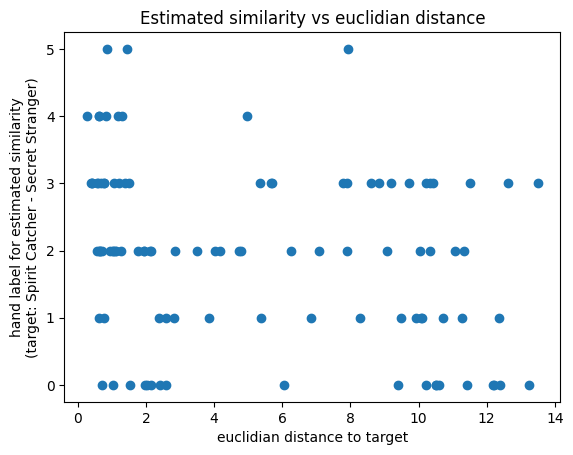

In [31]:
x = df["euclidian_distance"]
y = df["estimated_similarity"]
plt.scatter(x, y)
plt.xlabel("euclidian distance to target")
plt.ylabel("hand label for estimated similarity\n(target: Spirit Catcher - Secret Stranger)")
plt.title("Estimated similarity vs euclidian distance")
plt.show()

In [33]:
df.sort_values(by="euclidian_distance").head(25)

,audio_track,target,estimated_similarity,audio_track_embedding,target_embedding,euclidian_distance
74,"tracks/01 - Khan, Julee Cruise - Say Goodbye (...",tracks/17-Spirit Catcher--Secret Stranger (Dub...,4.0,"[-1.1169596910476685, -1.1624070405960083, -1....","[-1.0114926099777222, -1.094312071800232, -1.5...",0.268909
81,tracks/05 - Abdul Raeva - Xpress [209645191].aiff,tracks/17-Spirit Catcher--Secret Stranger (Dub...,3.0,"[-0.8409287333488464, -1.303032398223877, -1.4...","[-1.0114926099777222, -1.094312071800232, -1.5...",0.376907
10,tracks/01 - Look Around.aiff,tracks/17-Spirit Catcher--Secret Stranger (Dub...,3.0,"[-0.8760361075401306, -1.3372726440429688, -1....","[-1.0114926099777222, -1.094312071800232, -1.5...",0.413437
100,tracks/04. Giorgio Maulini - Storyteller (Orig...,tracks/17-Spirit Catcher--Secret Stranger (Dub...,3.0,"[-0.8714179992675781, -1.2164108753204346, -1....","[-1.0114926099777222, -1.094312071800232, -1.5...",0.417862
87,tracks/Maara - Fancy Feast - 03 Princess Expre...,tracks/17-Spirit Catcher--Secret Stranger (Dub...,2.0,"[-0.7366936206817627, -0.9961162209510803, -1....","[-1.0114926099777222, -1.094312071800232, -1.5...",0.553641
67,tracks/Zwicker - Made Up.mp3,tracks/17-Spirit Catcher--Secret Stranger (Dub...,3.0,"[-0.7877497673034668, -1.2411457300186157, -1....","[-1.0114926099777222, -1.094312071800232, -1.5...",0.571350
19,tracks/05 - Captain Comatose - $100.aiff,tracks/17-Spirit Catcher--Secret Stranger (Dub...,3.0,"[-0.7588992118835449, -1.3696039915084839, -1....","[-1.0114926099777222, -1.094312071800232, -1.5...",0.608671
35,tracks/04 Look Like A Man (Extended Version).mp3,tracks/17-Spirit Catcher--Secret Stranger (Dub...,4.0,"[-1.015477180480957, -1.0455684661865234, -1.5...","[-1.0114926099777222, -1.094312071800232, -1.5...",0.614420
68,"tracks/Carl Cox, Franky Wah - See the Sun Risi...",tracks/17-Spirit Catcher--Secret Stranger (Dub...,4.0,"[-0.6471863985061646, -1.115538239479065, -1.4...","[-1.0114926099777222, -1.094312071800232, -1.5...",0.627213
34,tracks/01 Josh Baker - In Two Minds.aiff,tracks/17-Spirit Catcher--Secret Stranger (Dub...,2.0,"[-0.714615523815155, -1.0978069305419922, -1.3...","[-1.0114926099777222, -1.094312071800232, -1.5...",0.631651


In [37]:
df

,audio_track,target,estimated_similarity,audio_track_embedding,target_embedding,euclidian_distance
0,tracks/05 - Shakedown - You Thing You Know.mp3,tracks/17-Spirit Catcher--Secret Stranger (Dub...,3.0,"[-0.9985936284065247, -1.0062944889068604, -1....","[-1.0114926099777222, -1.094312071800232, -1.5...",10.417911
1,tracks/04 - House Is Mine (Baby Doc Remix).aif,tracks/17-Spirit Catcher--Secret Stranger (Dub...,0.0,"[0.2816086709499359, -1.0610480308532715, -1.6...","[-1.0114926099777222, -1.094312071800232, -1.5...",2.024418
2,tracks/010 - Casanovy - I Need Your Lovin' (Mi...,tracks/17-Spirit Catcher--Secret Stranger (Dub...,3.0,"[-2.2747302055358887, -1.3059899806976318, -1....","[-1.0114926099777222, -1.094312071800232, -1.5...",8.607510
3,tracks/6 Transsylvanian Express.aiff,tracks/17-Spirit Catcher--Secret Stranger (Dub...,0.0,"[2.212617874145508, -1.0684103965759277, 0.033...","[-1.0114926099777222, -1.094312071800232, -1.5...",12.202872
4,tracks/01 - Natural Born Grooves - Universal L...,tracks/17-Spirit Catcher--Secret Stranger (Dub...,2.0,"[-1.3351902961730957, -1.4615778923034668, -1....","[-1.0114926099777222, -1.094312071800232, -1.5...",1.126604
...,...,...,...,...,...,...
97,tracks/Bliss Inc - Subaquatic.mp3,tracks/17-Spirit Catcher--Secret Stranger (Dub...,2.0,"[2.415205717086792, -0.8145125508308411, -1.33...","[-1.0114926099777222, -1.094312071800232, -1.5...",4.015395
98,tracks/11 Flux - Strange Feelings.aiff,tracks/17-Spirit Catcher--Secret Stranger (Dub...,0.0,"[-0.727423369884491, -0.9168245196342468, -1.2...","[-1.0114926099777222, -1.094312071800232, -1.5...",0.706197
99,tracks/10 - Little Computer People - Fly High.mp3,tracks/17-Spirit Catcher--Secret Stranger (Dub...,3.0,"[-0.7652099132537842, -0.9986684322357178, -1....","[-1.0114926099777222, -1.094312071800232, -1.5...",0.677195
100,tracks/04. Giorgio Maulini - Storyteller (Orig...,tracks/17-Spirit Catcher--Secret Stranger (Dub...,3.0,"[-0.8714179992675781, -1.2164108753204346, -1....","[-1.0114926099777222, -1.094312071800232, -1.5...",0.417862


In [40]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Split data into features and target variable
X = pd.DataFrame(df['audio_track_embedding'].values.tolist())
y = df['estimated_similarity'] # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Predict on the test data
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Additional evaluation metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.3548387096774194

Classification Report:
              precision    recall  f1-score   support

         0.0       0.25      0.20      0.22         5
         1.0       0.33      0.67      0.44         3
         2.0       0.33      0.30      0.32        10
         3.0       0.42      0.50      0.45        10
         4.0       0.00      0.00      0.00         2
         5.0       0.00      0.00      0.00         1

    accuracy                           0.35        31
   macro avg       0.22      0.28      0.24        31
weighted avg       0.31      0.35      0.33        31


Confusion Matrix:
[[1 0 3 1 0 0]
 [0 2 0 1 0 0]
 [2 2 3 3 0 0]
 [1 2 2 5 0 0]
 [0 0 1 1 0 0]
 [0 0 0 1 0 0]]


/Users/leopnt/Data/tracks_similarity/env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/leopnt/Data/tracks_similarity/env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/leopnt/Data/tracks_similarity/env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f